<a href="https://www.kaggle.com/code/shubkumarop/house-prices-xgb?scriptVersionId=132534172" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Xgboost architecture

![xg](https://www.researchgate.net/publication/348025909/figure/fig2/AS:1020217916416002@1620250314481/Simplified-structure-of-XGBoost.ppm)

# Loading data

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train_df=train_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
train_df.drop(['Id'],axis=1,inplace=True)

In [5]:
train_df = train_df.drop('FireplaceQu',axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Relation between the features

<Axes: >

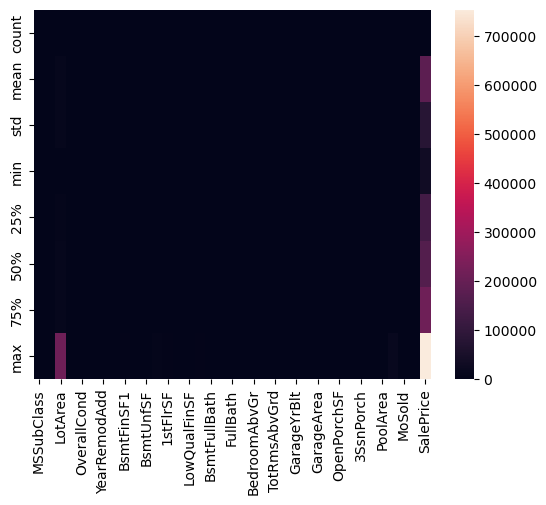

In [6]:
sns.heatmap(train_df.describe())

/tmp/ipykernel_20/3592735274.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), cmap="hot")


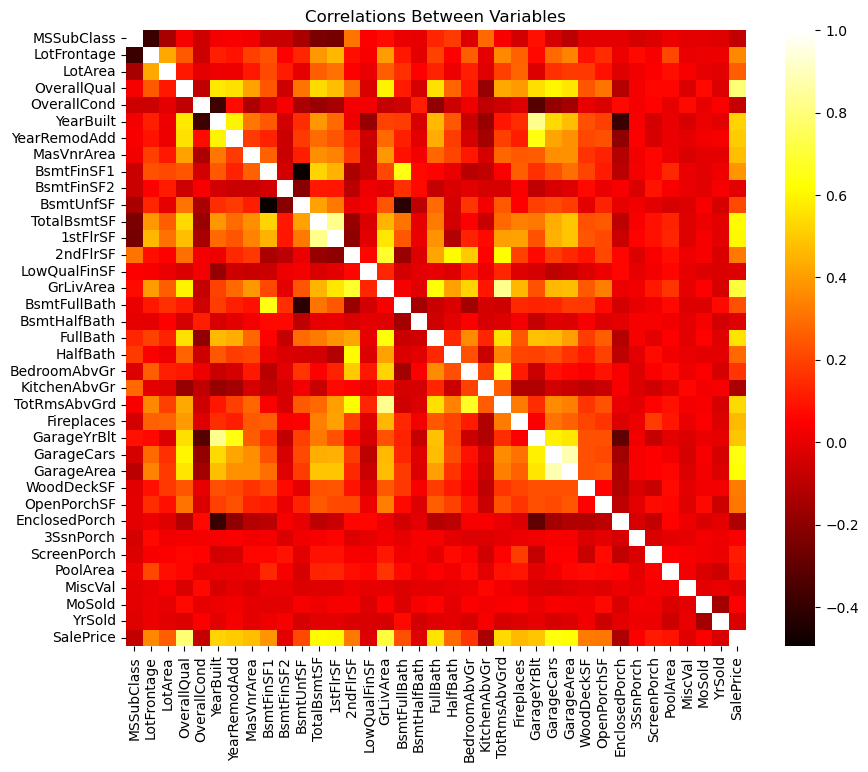

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), cmap="hot")
plt.title("Correlations Between Variables")
plt.show()

/tmp/ipykernel_20/3520598113.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

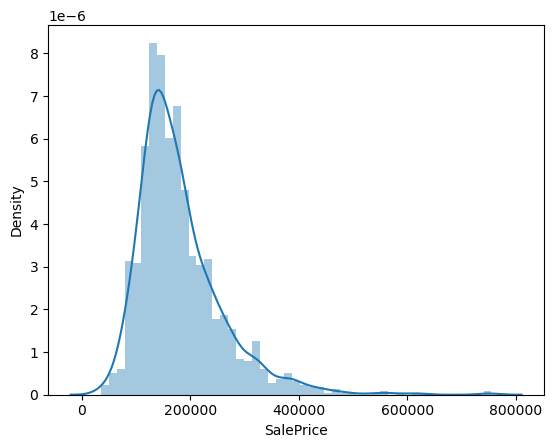

In [8]:
sns.distplot(train_df["SalePrice"])

# Data Cleaning

In [9]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())

In [10]:
test_df = test_df.drop('FireplaceQu',axis=1)

In [11]:
test_df['LotFrontage'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())

In [12]:
numerical_cols  = train_df.select_dtypes(include=['int64','float64'])
numerical_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
X = train_df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]
y = train_df['SalePrice']

In [14]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 1000)
model.fit(X_train,y_train)

[15:26:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [18]:
pred = model.predict(X_test)
pred

array([142583.31 , 316745.62 , 110953.875, 164084.69 , 303500.2  ,
        75857.52 , 227067.22 , 145726.33 ,  77504.85 , 131349.58 ,
       155025.03 , 118297.81 , 110463.89 , 192773.2  , 179215.84 ,
       131305.28 , 189529.69 , 132915.9  , 116464.51 , 211532.55 ,
       177390.8  , 226029.98 , 180649.77 , 140898.28 , 198784.47 ,
       166930.56 , 187086.78 ,  96326.23 , 183546.92 , 189989.89 ,
       116750.13 , 258233.56 , 236194.88 , 112186.07 , 260030.95 ,
       145091.84 , 149414.31 , 207597.83 , 336720.16 ,  93925.61 ,
       129934.484, 234291.34 , 117504.9  , 384452.66 , 127091.695,
       143533.11 , 110533.84 , 121724.984, 415810.62 , 135616.4  ,
       121944.6  , 191018.67 , 114102.695, 316324.12 , 144001.77 ,
       268940.84 , 185289.69 , 152058.23 , 151260.52 , 106286.8  ,
        70647.17 , 160515.1  , 301393.66 , 290308.4  , 273004.12 ,
       247525.7  , 108988.625, 327516.9  , 115480.336, 165896.44 ,
       119825.96 , 122359.46 , 114117.234,  91234.93 , 438390.

In [19]:
model.score(X_test,y_test)

0.9024291364521065

# Bar Chart of GradientBoostingRegressor Feature Importance Scores

Feature: 0, Score: 0.00617
Feature: 1, Score: 0.00561
Feature: 2, Score: 0.00376
Feature: 3, Score: 0.15331
Feature: 4, Score: 0.00683
Feature: 5, Score: 0.01191
Feature: 6, Score: 0.01385
Feature: 7, Score: 0.00856
Feature: 8, Score: 0.01611
Feature: 9, Score: 0.00201
Feature: 10, Score: 0.00170
Feature: 11, Score: 0.04208
Feature: 12, Score: 0.00443
Feature: 13, Score: 0.01859
Feature: 14, Score: 0.00068
Feature: 15, Score: 0.06963
Feature: 16, Score: 0.00885
Feature: 17, Score: 0.00088
Feature: 18, Score: 0.12296
Feature: 19, Score: 0.02344
Feature: 20, Score: 0.01476
Feature: 21, Score: 0.06820
Feature: 22, Score: 0.00660
Feature: 23, Score: 0.02655
Feature: 24, Score: 0.03202
Feature: 25, Score: 0.25614
Feature: 26, Score: 0.03502
Feature: 27, Score: 0.00306
Feature: 28, Score: 0.00303
Feature: 29, Score: 0.00167
Feature: 30, Score: 0.00143
Feature: 31, Score: 0.00423
Feature: 32, Score: 0.02270
Feature: 33, Score: 0.00065
Feature: 34, Score: 0.00154
Feature: 35, Score: 0.00100


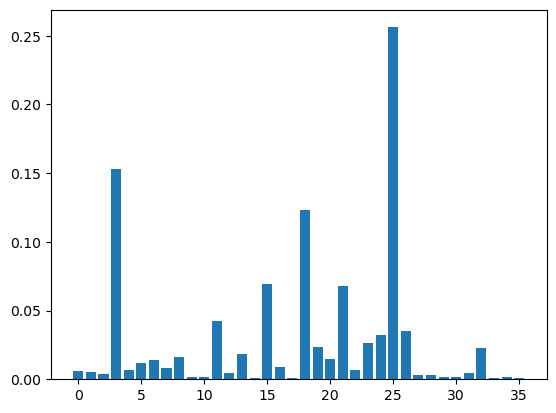

In [20]:
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [21]:
numerical_test_cols  = test_df.select_dtypes(include=['int64','float64'])
numerical_test_cols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [22]:
x_val = test_df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']]

In [23]:
pred_M = model.predict(x_val)

# Making submission ready

In [24]:
pred=pd.DataFrame(pred_M)

Directory=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

datasets=pd.concat([Directory['Id'],pred],axis=1)

datasets.columns=['Id','SalePrice']

datasets.to_csv('submission.csv',index=False)